In [ ]:
import obspy
import numpy as np
import matplotlib.pyplot as plt


In [129]:
tb, te = time_window = [-5, 30]

In [133]:
! ../bin/xex_rf_misfit ../example_data/dat.LI.STA0004.BXR.rf.sac.F2.5 ../example_data/syn.LI.STA0004.BXR.rf.sac.F2.5 ../example_data/syn.LI.STA0004.BXR.sac ../example_data/syn.LI.STA0004.BXZ.sac 0.2 50 $tb $te ./

 RF misfit:   1.0920653154958238E-003


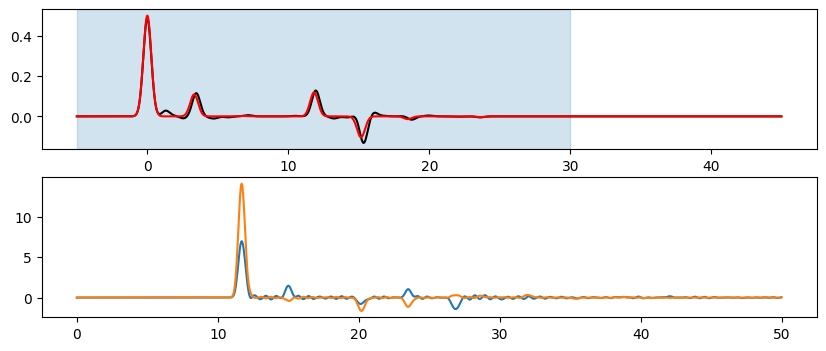

In [ ]:
rf_obs = obspy.read("../example_data/dat.LI.STA0004.BXR.rf.sac.F2.5")[0]
rf_syn = obspy.read("../example_data/syn.LI.STA0004.BXR.rf.sac.F2.5")[0]
synr = obspy.read("../example_data/syn.LI.STA0004.BXR.sac")[0]
synz = obspy.read("../example_data/syn.LI.STA0004.BXZ.sac")[0]
times = rf_obs.times() + rf_obs.stats.sac.b
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(times, rf_obs.data, label='Observed', color='black')
plt.plot(times, rf_syn.data, label='Synthetic', color='red')
ylim = plt.gca().get_ylim()
plt.gca().fill_betweenx(ylim, tb, te, alpha=0.2, color='C0')
plt.ylim(ylim)

plt.subplot(2, 1, 2)
plt.plot(synr.times(), synr.data, label='Synthetic R', color='C0')
plt.plot(synz.times(), synz.data, label='Synthetic Z', color='C1')

Text(0.5, 0.98, 'Receiver function misfit adjoint source')

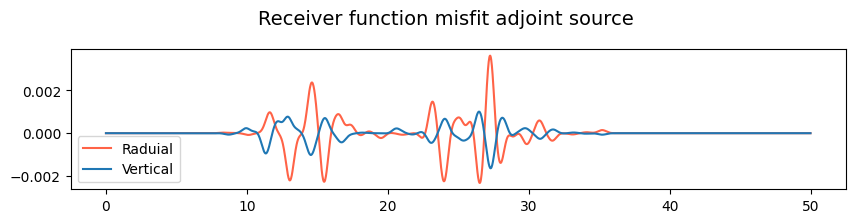

In [ ]:
adj_r = obspy.read('./LI.STA0004.BXR.rf.adj.sac')[0]
adj_z = obspy.read('./LI.STA0004.BXZ.rf.adj.sac')[0]
times = adj_r.times() + adj_r.stats.sac.b
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(adj_r.times(), adj_r.data, label='Radial', color='tomato', lw=1.5)
plt.legend(loc='lower left')
plt.plot(adj_z.times(), adj_z.data, label='Vertical', color='C0', lw=1.5)
plt.legend(loc='lower left')
plt.suptitle('Receiver function misfit adjoint source', fontsize=14)
